In [1]:
import os
import pandas as pd

# Define the source PREP directory
prep_dir = r"C:\Users\SujithaaR\Documents\FinalProject -DWH and DS\DWH\PREP"

# Define the target REPORT directory
report_dir = r"C:\Users\SujithaaR\Documents\FinalProject -DWH and DS\DWH\REPORT"  

# Create the PREP directory if it doesn't exist
os.makedirs(prep_dir, exist_ok=True)

# Function to load CSV files into DataFrames
def load_csv(file_name):
    file_path = os.path.join(prep_dir, file_name)
    return pd.read_csv(file_path)

# Load data from PREP CSV files
dim_user = load_csv('cleaned_employees.csv') 
dim_course = load_csv('cleaned_courses.csv')  
enrollment = load_csv('cleaned_enrollment.csv')  
quiz_data = load_csv('cleaned_quiz_results.csv')  
feedback_data = load_csv('cleaned_feedback.csv')  
comment_data = load_csv('cleaned_comments.csv')  
fact_engagement = load_csv('cleaned_modified_engagement.csv')  # Load the engagement data

# You can print or inspect the DataFrames if needed
print(dim_user.head())
print(dim_course.head())
print(enrollment.head())
print(quiz_data.head())
print(feedback_data.head())
print(comment_data.head())
print(fact_engagement.head())  # Print engagement data to verify



   employee_id         username                        email  isAdmin  \
0            1              Ywu  samanthaperkins@example.net     True   
1            2       Jennifer27           wevans@example.net     True   
2            3         Vedwards        matthew60@example.net    False   
3            4  Gonzalessabrina        melissa00@example.net     True   
4            5        Jessica89          tonya60@example.org    False   

             department                       team  timeSpent  gender  
0       Data Management        Infrastructure Team      86049    Male  
1  Software Development     Technical Support Team      56812  Female  
2        Cloud Services  User Experience (Ux) Team      79179    Male  
3            It Support                Devops Team      63847    Male  
4  Software Development  User Experience (Ux) Team      10197    Male  
   course_id                                 title  \
0          1   Proactive demand-driven methodology   
1          2      Dow

CREATE THE FACT TABLE

Key attributes - enrollment IDs, user IDs, course IDs, and flags indicating whether quizzes, feedback and comments were taken.

In [2]:
# Merge enrollment with engagement to create the fact table
fact_engagement_table = enrollment.merge(
    fact_engagement,
    on=['userId', 'enrollmentId', 'courseId'],  # Ensure these columns are the same in both DataFrames
    how='left'  # Use left join to keep all enrollment records
)

# Select relevant columns for the fact table
fact_engagement_table = fact_engagement_table[['userId', 'enrollmentId', 'courseId', 
                                                'enrolledAt', 'progress', 'completed', 
                                                'totalCount', 'completedCount', 
                                                'isQuizTaken', 'isParticipated', 
                                                'isFeedback', 'engagement']]

# Display the resulting fact engagement table
print("Fact Engagement Table:")
print(fact_engagement_table.head())

# Save the fact engagement table to a CSV file in the report directory
fact_engagement_table.to_csv(os.path.join(report_dir, 'fact_engagement.csv'), index=False)
print("Fact engagement table created and saved as 'fact_engagement.csv' in the REPORT directory!")

Fact Engagement Table:
   userId enrollmentId  courseId  enrolledAt  progress  completed  totalCount  \
0     158     rQS0kpxX        16  2024-10-07        71      False           9   
1     130     3AStlgcU        13  2024-10-07        76      False           9   
2     172     E2UsVdTq        18  2024-10-07        14      False          10   
3     271     fh9DWDHa        13  2024-10-07        60      False          11   
4     246     tmdGzFZb        20  2024-10-07        30      False          17   

   completedCount  isQuizTaken  isParticipated  isFeedback  engagement  
0               8        False            True        True           0  
1               7         True            True       False           0  
2               8         True            True       False           0  
3              10        False            True        True           1  
4               4         True            True       False           1  
Fact engagement table created and saved as 'fact_eng

CREATE THE DIMENSION TABLES

Create and save the dimension tables

In [3]:
dim_user.to_csv(os.path.join(report_dir, 'dim_employee.csv'), index=False)
dim_course.to_csv(os.path.join(report_dir, 'dim_course.csv'), index=False)


Create and save the Quiz dimension table only if quiz was taken

In [4]:
dim_quiz = quiz_data[quiz_data['enrollmentId'].isin(fact_engagement_table[fact_engagement_table['isQuizTaken']]['enrollmentId'])]
dim_quiz = dim_quiz[['quizId', 'userId', 'courseId', 'enrollmentId', 'totalScore', 'obtainedScore', 'date']]

dim_quiz.to_csv(os.path.join(report_dir, 'dim_quiz.csv'), index=False)

Create and save the Feedback dimension table only if feedback was given

In [5]:
dim_feedback = feedback_data[feedback_data['enrollmentId'].isin(fact_engagement_table[fact_engagement_table['isFeedback']]['enrollmentId'])]
dim_feedback = dim_feedback[['feedbackId', 'courseId', 'userId', 'enrollmentId', 'overallSatisfaction', 'contentQuality', 'instructorEffectiveness', 'comments', 'createdAt']]

dim_feedback.to_csv(os.path.join(report_dir, 'dim_feedback.csv'), index=False)

Create and save the Comments dimension table only if comments were made

In [6]:
dim_comments = comment_data[comment_data['enrollmentId'].isin(fact_engagement_table[fact_engagement_table['isParticipated']]['enrollmentId'])]
dim_comments = dim_comments[['commentId', 'userId', 'enrollmentId', 'courseId', 'content', 'createdAt']]

dim_comments.to_csv(os.path.join(report_dir, 'dim_comments.csv'), index=False)

INSIGHTS

In [7]:
display(fact_engagement_table.columns)
display(dim_user.columns)
display(dim_course.columns)
display(dim_comments.columns)
display(dim_feedback.columns)
display(dim_quiz.columns)

Index(['userId', 'enrollmentId', 'courseId', 'enrolledAt', 'progress',
       'completed', 'totalCount', 'completedCount', 'isQuizTaken',
       'isParticipated', 'isFeedback', 'engagement'],
      dtype='object')

Index(['employee_id', 'username', 'email', 'isAdmin', 'department', 'team',
       'timeSpent', 'gender'],
      dtype='object')

Index(['course_id', 'title', 'description', 'topics'], dtype='object')

Index(['commentId', 'userId', 'enrollmentId', 'courseId', 'content',
       'createdAt'],
      dtype='object')

Index(['feedbackId', 'courseId', 'userId', 'enrollmentId',
       'overallSatisfaction', 'contentQuality', 'instructorEffectiveness',
       'comments', 'createdAt'],
      dtype='object')

Index(['quizId', 'userId', 'courseId', 'enrollmentId', 'totalScore',
       'obtainedScore', 'date'],
      dtype='object')

Engagement Metrics Analysis

Engagement Summary:
    courseId   progress  completed  isQuizTaken  isParticipated  isFeedback
0          1  49.960000          2          137             115         138
1          2  51.933884          2          117             118         132
2          3  50.687023          1          128             128         134
3          4  53.920635          2          124             147         120
4          5  48.562992          2          126             125         116
5          6  52.148438          3          140             122         119
6          7  50.730159          1          126             132         136
7          8  49.627049          1          118             118         116
8          9  50.504032          2          119             128         126
9         10  52.091667          3          117             112         119
10        11  50.614504          2          133             119         139
11        12  51.365854          3          108             122     

C:\Users\SujithaaR\AppData\Local\Temp\ipykernel_24572\1715644893.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_engaged_courses, x='title', y='progress', palette='viridis')


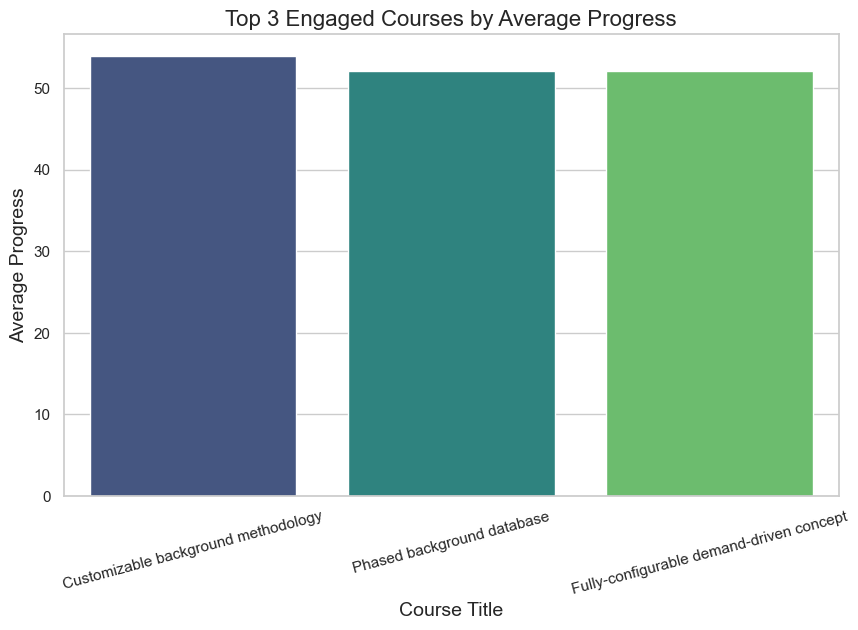

In [8]:
# Engagement summary
engagement_summary = fact_engagement_table.groupby('courseId').agg({
    'progress': 'mean',
    'completed': 'sum',
    'isQuizTaken': 'sum',
    'isParticipated': 'sum',
    'isFeedback': 'sum'
}).reset_index()

print("Engagement Summary:")
print(engagement_summary)

# Merge the engagement summary with course titles
engagement_summary_with_titles = engagement_summary.merge(dim_course, left_on='courseId', right_on='course_id')

# Sort by 'progress' and get the top 3 courses
top_engaged_courses = engagement_summary_with_titles.sort_values(by='progress', ascending=False).head(3)

# Display relevant columns including the course title
print("Top 3 Engaged Courses:")
print(top_engaged_courses[['title', 'progress', 'completed', 'isQuizTaken', 'isParticipated', 'isFeedback']])

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming top_engaged_courses is already defined
plt.figure(figsize=(10, 6))

# Set the style
sns.set(style='whitegrid')

# Create a bar plot for the top 3 engaged courses
sns.barplot(data=top_engaged_courses, x='title', y='progress', palette='viridis')

# Add labels and title
plt.title('Top 3 Engaged Courses by Average Progress', fontsize=16)
plt.xlabel('Course Title', fontsize=14)
plt.ylabel('Average Progress', fontsize=14)
plt.xticks(rotation=15)  # Rotate x labels for better readability

# Show the plot
plt.show()


Demographics Analysis

In [9]:
user_engagement = dim_user.merge(fact_engagement_table, left_on='employee_id', right_on='userId')

# Calculate average progress and completion count by department and gender
demographic_engagement = user_engagement.groupby(['department']).agg({
    'completed': 'sum',
    'timeSpent': 'sum'  # If time spent is relevant
}).reset_index()

display(demographic_engagement)

# Sort by time spent and completed count
sorted_engagement = demographic_engagement.sort_values(by=['timeSpent', 'completed'], ascending=False)

# Display the department with the highest time spent and completions
top_department = sorted_engagement.head(1)

print("\nDepartment with Maximum Time Spent and Completions:")
print(top_department)



,department,completed,timeSpent
0,Cloud Services,8,36102461
1,Cybersecurity,3,29002598
2,Data Management,6,49303063
3,It Support,13,47287198
4,Network Administration,5,38869700
5,Software Development,10,46184207



Department with Maximum Time Spent and Completions:
        department  completed  timeSpent
2  Data Management          6   49303063


C:\Users\SujithaaR\AppData\Local\Temp\ipykernel_24572\1645674.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_engagement, x='department', y='completed', palette='viridis')


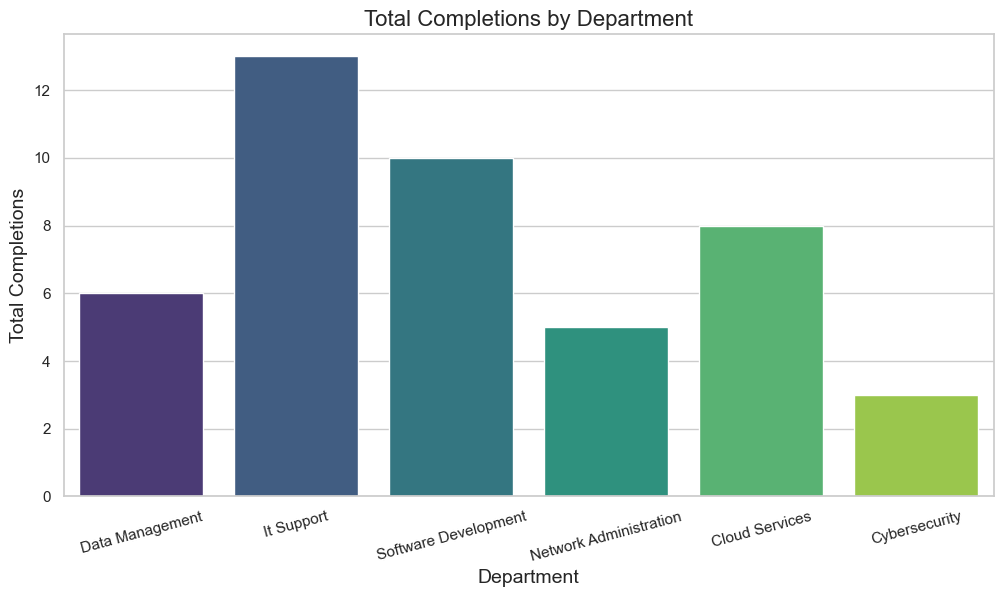

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Create a bar plot for completed count
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_engagement, x='department', y='completed', palette='viridis')

# Add labels and title
plt.title('Total Completions by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Total Completions', fontsize=14)

# Rotate x labels for better readability
plt.xticks(rotation=15)

# Show the plot
plt.show()


Course Content Analysis

In [11]:
# Average satisfaction by course
course_feedback = dim_feedback.merge(dim_course, left_on='courseId',right_on='course_id').groupby('courseId').agg({
    'overallSatisfaction': 'mean',
    'contentQuality': 'mean',
    'instructorEffectiveness': 'mean'
}).reset_index()

print("\nCourse Feedback Summary:")
print(course_feedback)

# Sort by overallSatisfaction, contentQuality, or instructorEffectiveness
top_courses = course_feedback.sort_values(by='overallSatisfaction', ascending=False).head(3)

# Include course titles by merging with the course data
top_courses_with_titles = top_courses.merge(dim_course[['course_id', 'title']], left_on='courseId', right_on='course_id')

print("\nTop 3 Courses Based on Average Satisfaction:")
print(top_courses_with_titles[['courseId', 'title', 'overallSatisfaction', 'contentQuality', 'instructorEffectiveness']])


Course Feedback Summary:
    courseId  overallSatisfaction  contentQuality  instructorEffectiveness
0          1             2.731884        3.115942                 2.797101
1          2             3.106061        2.962121                 3.000000
2          3             3.000000        2.925373                 2.888060
3          4             3.116667        3.216667                 3.166667
4          5             3.060345        2.913793                 3.000000
5          6             2.865546        2.882353                 2.697479
6          7             3.066176        2.852941                 3.242647
7          8             2.922414        3.051724                 3.103448
8          9             2.952381        2.753968                 3.079365
9         10             3.000000        3.000000                 2.831933
10        11             3.014388        3.007194                 2.812950
11        12             3.131579        3.043860                 2.754386

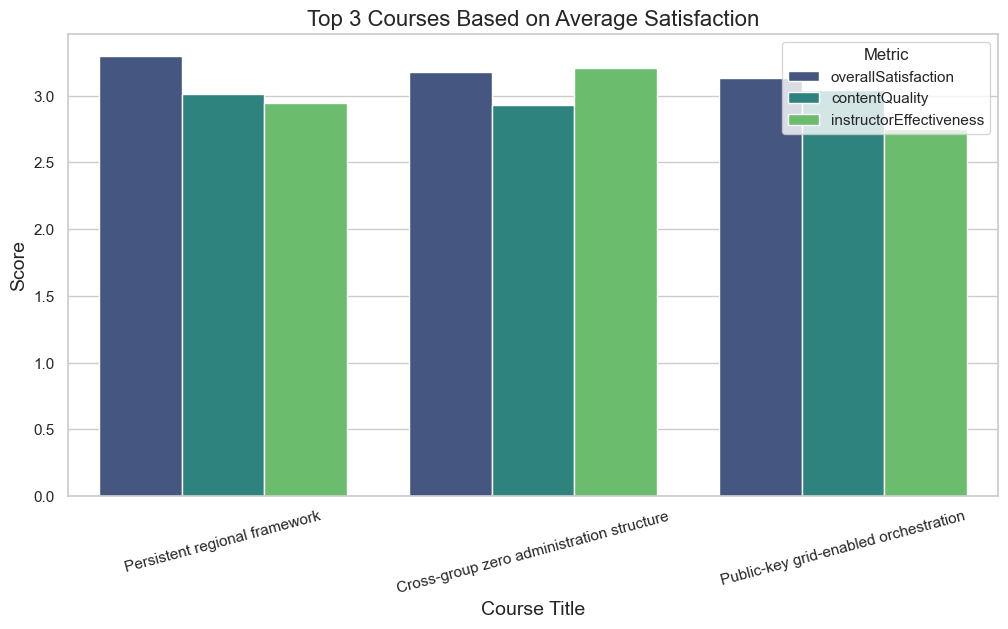

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Melt the DataFrame for easier plotting
melted_courses = top_courses_with_titles.melt(id_vars=['title'], 
                                               value_vars=['overallSatisfaction', 'contentQuality', 'instructorEffectiveness'],
                                               var_name='Metric', 
                                               value_name='Score')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_courses, x='title', y='Score', hue='Metric', palette='viridis')

# Add labels and title
plt.title('Top 3 Courses Based on Average Satisfaction', fontsize=16)
plt.xlabel('Course Title', fontsize=14)
plt.ylabel('Score', fontsize=14)

# Rotate x labels for better readability
plt.xticks(rotation=15)

# Show legend
plt.legend(title='Metric')

# Show the plot
plt.show()


In [13]:
# Count enrollments by course
enrollment_counts = fact_engagement_table.groupby('courseId')['enrollmentId'].nunique().reset_index(name='enrollmentCount')

# Merge with course titles to include titles
enrollment_counts = enrollment_counts.merge(dim_course[['course_id', 'title']], left_on='courseId', right_on='course_id')

# Sort by enrollment count in descending order
most_enrolled_course = enrollment_counts.sort_values(by='enrollmentCount', ascending=False).head(1)

print("\nCourse with Most Enrollments:")
print(most_enrolled_course[['courseId', 'title', 'enrollmentCount']])



Course with Most Enrollments:
    courseId                            title  enrollmentCount
10        11  Secured human-resource alliance              262


Comments Analysis

In [14]:
# Function to get the most common full comment
def most_common_full_comment(comments):
    return comments.value_counts().idxmax() if not comments.empty else None

# Apply the function to find the most common full comment by courseId
most_common_feedback = dim_feedback.groupby('courseId')['comments'].apply(most_common_full_comment).reset_index()

print("\nMost Common Full Comment by Course:")
print(most_common_feedback)




Most Common Full Comment by Course:
    courseId           comments
0          1      Great course!
1          2   Could be better.
2          3      Great course!
3          4   Could be better.
4          5      Great course!
5          6   Could be better.
6          7      Great course!
7          8   Could be better.
8          9  Very informative.
9         10   Could be better.
10        11   Could be better.
11        12  Very informative.
12        13  Very informative.
13        14      Great course!
14        15  Very informative.
15        16      Great course!
16        17  Very informative.
17        18   Could be better.
18        19  Very informative.
19        20      Great course!


Quiz Performance Analysis

In [15]:
# Average scores by course
quiz_performance = dim_quiz.groupby('courseId').agg({
    'totalScore': 'mean',
    'obtainedScore': 'mean'
}).reset_index()

print("\nQuiz Performance Summary:")
print(quiz_performance)




Quiz Performance Summary:
    courseId  totalScore  obtainedScore
0          1       100.0      48.270073
1          2       100.0      50.205128
2          3       100.0      51.054688
3          4       100.0      53.766129
4          5       100.0      50.222222
5          6       100.0      49.978571
6          7       100.0      52.746032
7          8       100.0      46.703390
8          9       100.0      52.932773
9         10       100.0      52.846154
10        11       100.0      51.187970
11        12       100.0      48.620370
12        13       100.0      47.629032
13        14       100.0      48.238095
14        15       100.0      49.333333
15        16       100.0      46.592593
16        17       100.0      53.524590
17        18       100.0      49.116071
18        19       100.0      49.512821
19        20       100.0      46.704545


Analyze Time Spent by Department

In [16]:
# Merge user data with engagement data
user_engagement = dim_user.merge(fact_engagement_table, left_on='employee_id', right_on='userId')

# Sum time spent by department
time_spent_by_department = user_engagement.groupby('department').agg({
    'timeSpent': 'sum'
}).reset_index()

# Sort by time spent in descending order
time_spent_by_department = time_spent_by_department.sort_values(by='timeSpent', ascending=False)

print("\nTotal Time Spent by Department:")
print(time_spent_by_department)



Total Time Spent by Department:
               department  timeSpent
2         Data Management   49303063
3              It Support   47287198
5    Software Development   46184207
4  Network Administration   38869700
0          Cloud Services   36102461
1           Cybersecurity   29002598


In [17]:
# Count quizzes taken by course
quiz_counts = dim_quiz.groupby('courseId').size().reset_index(name='quizTaken')

# Merge with course titles
top_quiz_courses = quiz_counts.merge(dim_course[['course_id', 'title']], left_on='courseId', right_on='course_id')

# Sort by number of quizzes taken
top_quiz_courses = top_quiz_courses.sort_values(by='quizTaken', ascending=False).head(5)

print("\nTop 5 Courses with Most Quizzes Taken:")
print(top_quiz_courses[['courseId', 'title', 'quizTaken']])



Top 5 Courses with Most Quizzes Taken:
    courseId                                   title  quizTaken
5          6              Phased background database        140
0          1     Proactive demand-driven methodology        137
15        16  Integrated context-sensitive migration        135
10        11         Secured human-resource alliance        133
14        15   Stand-alone fresh-thinking initiative        132
